### Искусственный интеллект в космической отрасли

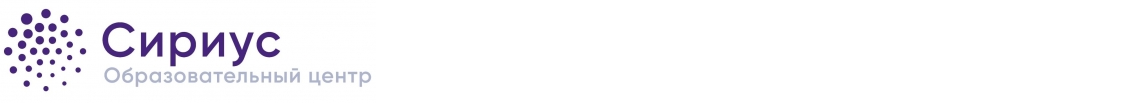

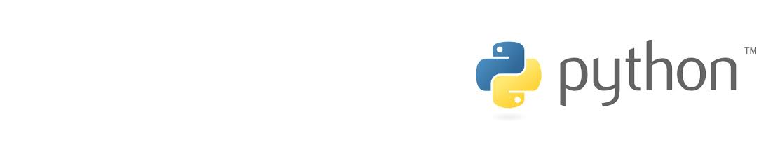

### Алина Черкас  
**GitHub:** https://github.com/AlinaCh8  
**e-mail:** alina-cherkas@mail.ru

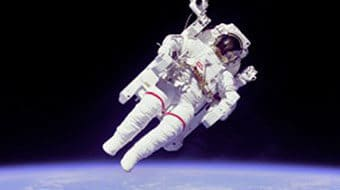

**Extra-vehicular Activity (US and Russia)** - выходы в открытый космос, работа за бортом.  
В наборе представлена полная информация о выходах в открытый космос (СССР/США/Россия), начиная с самого первого, совершенного Алексеем Леоновым.

Набор содержит информацию в виде:
Внекорабельная деятельность — Страна — Кто выходил — Космический аппарат — Дата — Продолжительность выхода (Время) — Цель

In [ ]:
# Импорт библиотеки Pandas для работы с таблицей
import pandas as pd

In [7]:
# чтение файла
df = pd.read_csv('Extra-vehicular_Activity__EVA__-_US_and_Russia.csv')

In [8]:
df.tail(3)

,EVA #,Country,Crew,Vehicle,Date,Duration,Purpose
372,369.0,Russia,Fyodor Yurchikhin Alexander M...,ISS Incr-36,06/24/2013,6:34,Power cable clamps installed and Kurs tested i...
373,370.0,Russia,Fyodor Yurchikhin Alexander M...,ISS Incr-36,08/16/2013,7:29,"Â Installed VINOSLIVOST experiment on MRM2, 2..."
374,371.0,Russia,Fyodor Yurchikhin Alexander M...,ISS Incr-36,08/22/2013,5:58,Â Retrieved laser downlink comm experiment fr...


### 1. Посмотрим на распределение стран, отправляющих космонавтов в космос

In [4]:
df.Country.value_counts()

USA       236
Russia    139
Name: Country, dtype: int64

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

<AxesSubplot:ylabel='Country'>

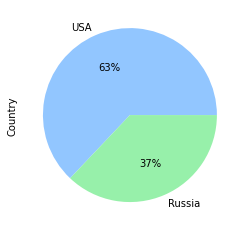

In [10]:
df.Country.value_counts().plot(kind='pie',
                               autopct='%1.0f%%')

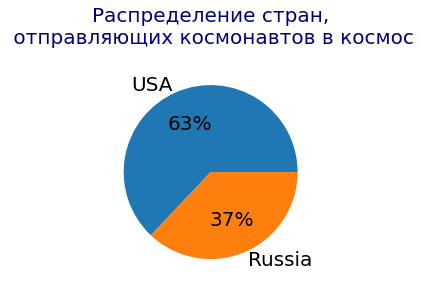

In [5]:
# Посмотрим на соотношение добросовестных и дефолтных клиентов банка


df.Country.value_counts().plot(kind='pie',
                               autopct='%1.0f%%',
                               fontsize=20)

# http://tonysyu.github.io/raw_content/matplotlib-style-gallery/gallery.html
plt.style.use('seaborn-pastel')

plt.title('''Распределение стран,
 отправляющих космонавтов в космос''', fontsize=20, pad=20,  color='navy')

# https://matplotlib.org/stable/gallery/color/named_colors.html

plt.ylabel(None)
plt.show()
#plt.rcParams["figure.figsize"] = [8, 6] # ширина и высота графика

In [6]:
df.Crew

AttributeError: 'DataFrame' object has no attribute 'Crew'

Изучим названия столбцов:

In [11]:
df.columns

Index(['EVA #', 'Country', 'Crew    ', 'Vehicle', 'Date', 'Duration',
       'Purpose '],
      dtype='object')

Изменим названия стобцов:

In [12]:
df.columns = ['EVA', 'Country', 'Crew', 'Vehicle', 'Date', 'Duration',
              'Purpose']

In [13]:
df['Crew'].value_counts()[:10]

Leonid Kizim          Vladimir Solovyov        8
Talgat Musabeyev     Nikola Budarin            6
Yuri Onufrenko           Yuri Usachev          6
Sergei Krikalev         Anatoli Artsebarsky    6
Valeri Tsibliyev      Alexandr Serebrov        5
Vladimir Dezhurov      Gennady Strekalov       5
Alexandr Viktorenko   Alexandr Serebrov        5
David Scott                   James Irwin      4
John Young        Charles Duke                 4
Harrison Schmidt   Eugene Cernan               4
Name: Crew, dtype: int64

In [14]:
a = '          '
len(a)

10

In [15]:
b = '           '
len(b)

11

In [18]:
type(df['Crew'][0])

str

Задача: извлечь имя и фамилию из ячейки, где два имени и две фамилии разделены разным количеством пробелов.  
Решение: используем регулярные выражения для извлечения нужных символов из строки.

**Регулярные выражения** — это формальный язык, основанный на использовании метасимволов (или так называемых символов-джокеров), который применяется для работы с подстроками в тексте.

Главный секрет универсальности и гибкости регулярных выражений заключается в том, что при создании подстроки мы можем использовать так называемые метасимволы, или символы подстановки. Метасимволы используются для замены других символов или их последовательностей. В результате получается не строгая структура подстроки, а своеобразный шаблон, который может быть соотнесён с несколькими вариантами реальных строк.

В таблице ниже представлены наиболее важные символы, использующиеся при создании регулярных выражений и примеры их применения. 

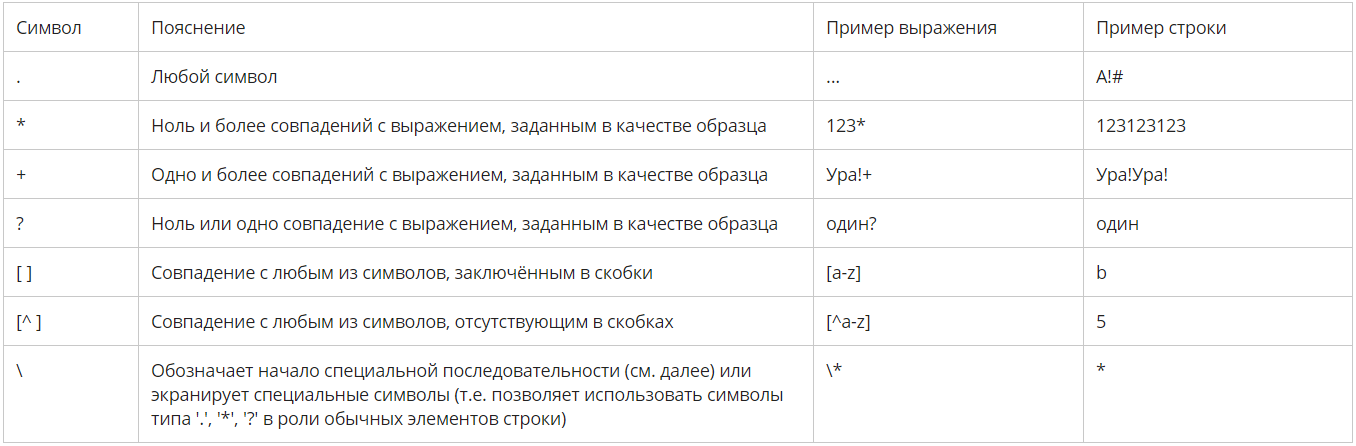

В приведённой выше таблице отмечены две роли метасимвола '\'. С одной стороны, данный символ позволяет экранировать метасимволы, благодаря чему мы можем использовать точку, вопросительный знак, квадратные скобки и другие метасимволы по их прямому назначению (т.е. как обычную точку или вопросительный знак). Второе назначение обратного слэша — это сигнал о начале специальной последовательности, с помощью которой можно заменить определённую группу символов. Примеры таких последовательностей представлены в таблице ниже:

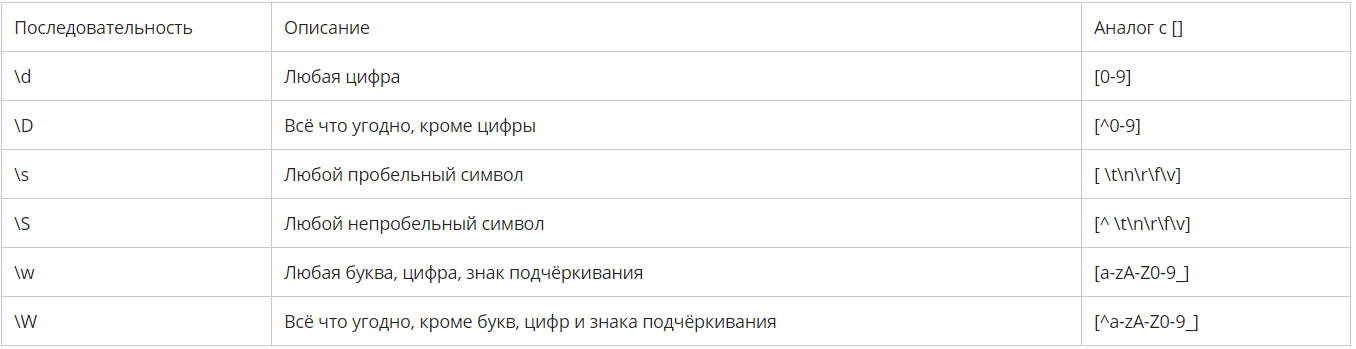

[Этот сайт](https://regex101.com/) отличается очень простым интерфейсом, но при этом отлично справляется с задачей нахождения совпадений между регулярным выражением, которое нужно указывать в поле "Regular Expression" и строкой, которую нужно ввести в поле "Text String".

На [этом сайте](https://regexr.com/) помимо установления соответствия между регулярным выражением и строкой вы сможете увидеть дополнительные пояснения о том, что означает каждый элемент используемого при проверке регулярного выражения.

### Модуль re
Для работы с регулярными выражениями необходимо подключить дополнительный модуль, который называется re. Подключение происходит с помощью команды **import**, после которой необходимо указать имя модуля: **re**

In [21]:
import re

Чтобы у нас появилась возможность использовать методы модуля re, нам необходимо создать объект, к которому все эти методы могут быть применимы. Таким объектом является шаблон, или паттерн, создаваемый с помощью функции compile.

In [26]:
pattern = re.compile('[А-Я][а-я]*\W')

### Способы поиска паттернов
В модуле re есть несколько методов, которые можно использовать для поиска паттернов:

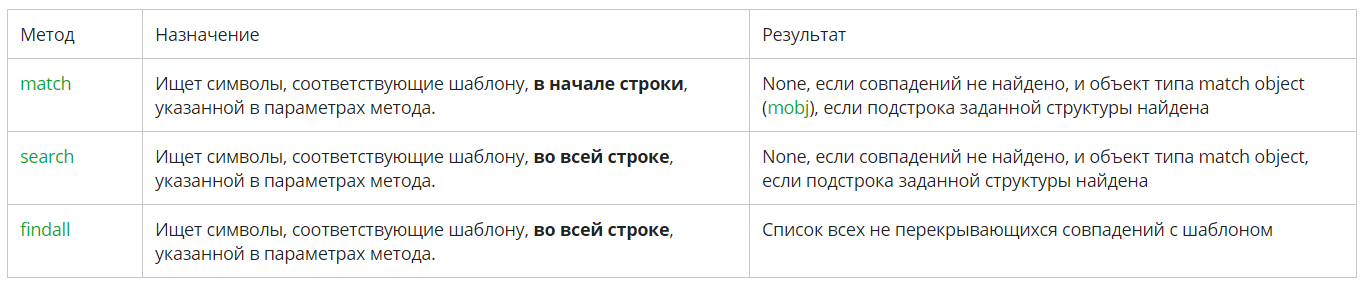

In [24]:
string = 'Leonid Kizim          Vladimir Solovyov'

In [42]:
string = '!!! Йо! Учиться, учиться и учиться! Вперед! Только вперед!' 

In [35]:
pattern.match(string)

In [36]:
pattern.search(string)

<re.Match object; span=(4, 6), match='Йо'>

In [43]:
pattern.findall(string)

['Йо', 'Учиться', 'Впер', 'Только']

Итак, анализ результатов показал нам следующее:

- метод **match** не вернул нам ничего (точнее, вернул нам "Ничего", или None-значение), т.к. строка начинается с трёх восклицательных знаков, что не соответствует заданному шаблону;
- метод **search** нашёл только первое вхождение строки, совпавшей с шаблоном; данное вхождение соответствует подстроке "Йо!", и занимает позиции с 4 по 7;
- метод **findall** вернул список из трёх элементов, соответствующих заданной строке; кстати, обратите внимание, что слово "Вперёд" из-за присутствующей в нём буквы "ё" не было включено в список.

In [22]:
result = re.findall(r'\S+\s+\S+', 'Leonid Kizim          Vladimir Solovyov')
print (result)

['Leonid Kizim', 'Vladimir Solovyov']


In [40]:
df['Crew']

0                                   [Ed White]
1                                [David Scott]
2                              [Eugene Cernan]
3                               [Mike Collins]
4                               [Mike Collins]
                        ...                   
370        [Gennady Padalka, Yuri Malenchenko]
371        [Pavel Vinogradov, Roman Romanenko]
372    [Fyodor Yurchikhin, Alexander Misurkin]
373    [Fyodor Yurchikhin, Alexander Misurkin]
374    [Fyodor Yurchikhin, Alexander Misurkin]
Name: Crew, Length: 375, dtype: object

In [38]:
def split_phrase(phrase):
    return re.findall('\S+\s+\S+', phrase)

df['Crew'] = df['Crew'].apply(split_phrase)

In [39]:
df['Crew']

0                                   [Ed White]
1                                [David Scott]
2                              [Eugene Cernan]
3                               [Mike Collins]
4                               [Mike Collins]
                        ...                   
370        [Gennady Padalka, Yuri Malenchenko]
371        [Pavel Vinogradov, Roman Romanenko]
372    [Fyodor Yurchikhin, Alexander Misurkin]
373    [Fyodor Yurchikhin, Alexander Misurkin]
374    [Fyodor Yurchikhin, Alexander Misurkin]
Name: Crew, Length: 375, dtype: object

In [47]:
df['Crew'][50]

['Bob Stewart', 'Bruce McCandless']

In [ ]:
str(res[60])

In [49]:
from collections import Counter

In [52]:
# Счётчик космонавтов, встречающихся в данных:
astronauts = Counter()
for i in df['Crew'].dropna():
    i = str(i).replace("'","").replace("[","").replace("]","").split(', ')
    i = [astronaut for astronaut in i if len(i) > 0]
    astronauts.update(i)

print('В наборе данных представлено', len(astronauts), 'космонавтов.')
print('Больше всех полетов совершил:',
      astronauts.most_common()[0][0])

В наборе данных представлено 225 космонавтов.
Больше всех полетов совершил: Alexandr Serebrov


In [ ]:
display(astronauts)

In [ ]:
type(cuisine_styles)

In [ ]:
cuisine_styles.most_common()

In [53]:
astronauts.most_common()[0:5]

[('Alexandr Serebrov', 10),
 ('Sergei Avdeyev', 10),
 ('Anatoly Solovyev', 10),
 ('Jerry Ross', 9),
 ('Mike Fincke', 9)]

In [57]:
#list(reversed(astronauts.most_common()))

In [59]:
display(df.tail(3))

,EVA,Country,Crew,Vehicle,Date,Duration,Purpose
372,369.0,Russia,"[Fyodor Yurchikhin, Alexander Misurkin]",ISS Incr-36,06/24/2013,6:34,Power cable clamps installed and Kurs tested i...
373,370.0,Russia,"[Fyodor Yurchikhin, Alexander Misurkin]",ISS Incr-36,08/16/2013,7:29,"Â Installed VINOSLIVOST experiment on MRM2, 2..."
374,371.0,Russia,"[Fyodor Yurchikhin, Alexander Misurkin]",ISS Incr-36,08/22/2013,5:58,Â Retrieved laser downlink comm experiment fr...


In [60]:
df.EVA.value_counts()

371.0    1
127.0    1
118.0    1
119.0    1
120.0    1
        ..
249.0    1
250.0    1
251.0    1
252.0    1
1.0      1
Name: EVA, Length: 371, dtype: int64

In [61]:
df.index

RangeIndex(start=0, stop=375, step=1)

In [62]:
len(df)

375

In [63]:
len(df.EVA)

375

In [66]:
df.EVA.sort_values(ascending=False)

374    371.0
373    370.0
372    369.0
371    368.0
370    367.0
       ...  
0        1.0
37       NaN
47       NaN
61       NaN
82       NaN
Name: EVA, Length: 375, dtype: float64

In [68]:
df.isnull().sum()

EVA          4
Country      0
Crew         0
Vehicle      1
Date        44
Duration     1
Purpose      4
dtype: int64

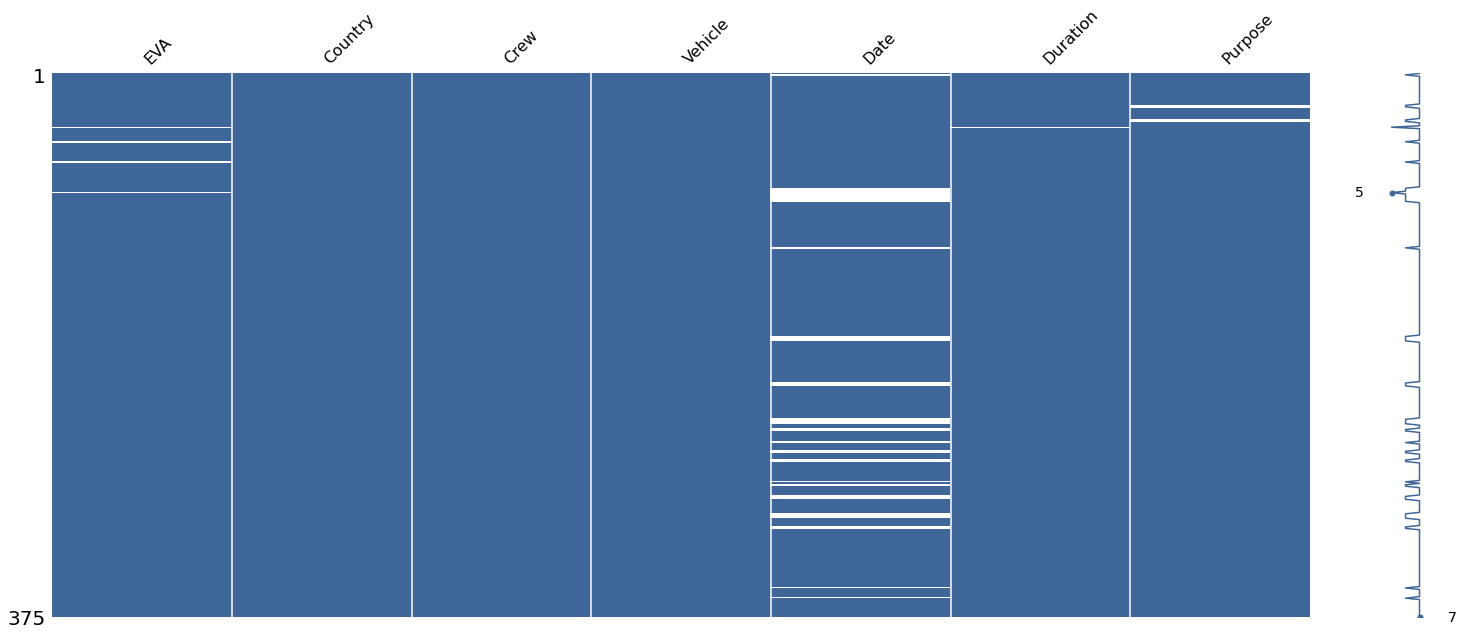

In [78]:
# Отобразим имеющиеся пропуски
import missingno as msgn
msgn.matrix(df, color=(0.25, 0.4, 0.6))
plt.show()

In [70]:
df.Vehicle.value_counts()

Soyuz TM-26      Mir 24    7
Apollo 15                  6
Soyuz T-10     Salyut 7    6
Soyuz TM-23     Mir 21     6
Soyuz TM-12      Mir       6
                          ..
STS-72                     1
STS-57                     1
Soyuz TM-30    Mir 28      1
ISS Incr-12                1
STS-80                     1
Name: Vehicle, Length: 151, dtype: int64

In [74]:
result = re.findall(r'\S+\s+\S+', '')
print (result)

[]


In [ ]:
df['Vehicle'].value_counts()

In [ ]:
df['Vehicle']

In [77]:
df.Vehicle = df.Vehicle.fillna('Unknown')

In [98]:
def split_phrase(phrase):
    return re.findall('\S+\s+\S+', phrase)

df['Vehicle'] = df['Vehicle'].apply(split_phrase)
df['Vehicle']

0        [Gemini IV]
1      [Gemini VIII]
2      [Gemini IX-A]
3         [Gemini X]
4         [Gemini X]
           ...      
370    [ISS Incr-32]
371    [ISS Incr-35]
372    [ISS Incr-36]
373    [ISS Incr-36]
374    [ISS Incr-36]
Name: Vehicle, Length: 375, dtype: object

In [99]:
# Счётчик космических аппаратов, встречающихся в данных:
vehicles = Counter()
for i in df['Vehicle'].dropna():
    i = str(i).replace("''","").replace("[","").replace("]","").split(', ')
    i = [x for x in i if len(i) > 0]
    vehicles.update(i)

print('В наборе данных представлено', len(vehicles)-1, 'космических аппарата.')
print('Больше всех представлен:',
      vehicles.most_common()[1][0])

В наборе данных представлено 102 космических аппарата.
Больше всех представлен: 'Salyut 7'


In [101]:
display(vehicles.most_common()[1:10])

[("'Salyut 7'", 13),
 ("'Soyuz TM-26'", 7),
 ("'Mir 24'", 7),
 ("'Apollo 15'", 6),
 ("'Soyuz T-10'", 6),
 ("'Soyuz TM-12'", 6),
 ("'Soyuz TM-23'", 6),
 ("'Mir 21'", 6),
 ("'Soyuz TM-27'", 6)]

In [103]:
df.tail(2)

,EVA,Country,Crew,Vehicle,Date,Duration,Purpose
373,370.0,Russia,"[Fyodor Yurchikhin, Alexander Misurkin]",[ISS Incr-36],08/16/2013,7:29,"Â Installed VINOSLIVOST experiment on MRM2, 2..."
374,371.0,Russia,"[Fyodor Yurchikhin, Alexander Misurkin]",[ISS Incr-36],08/22/2013,5:58,Â Retrieved laser downlink comm experiment fr...


In [105]:
df.Date.value_counts()

03/06/1969    2
07/20/1969    2
04/23/1972    2
09/16/1993    2
05/25/1973    2
             ..
07/28/1999    1
12/23/1999    1
05/04/1984    1
05/21/2000    1
07/14/1995    1
Name: Date, Length: 322, dtype: int64

In [106]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 375 entries, 0 to 374
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   EVA       371 non-null    float64
 1   Country   375 non-null    object 
 2   Crew      375 non-null    object 
 3   Vehicle   375 non-null    object 
 4   Date      331 non-null    object 
 5   Duration  374 non-null    object 
 6   Purpose   371 non-null    object 
dtypes: float64(1), object(6)
memory usage: 20.6+ KB


In [115]:
type(df.Date[0])

pandas._libs.tslibs.timestamps.Timestamp

In [110]:
df.Date = df.Date.replace('/', '.')

In [113]:
df.Date

0      06/03/1965
1             NaN
2      06/05/1966
3      07/19/1966
4      07/20/1966
          ...    
370    08/20/2012
371    04/19/2013
372    06/24/2013
373    08/16/2013
374    08/22/2013
Name: Date, Length: 375, dtype: object

In [114]:
df.Date = pd.to_datetime(df.Date, format='%m/%d/%Y')

In [116]:
df['Year'] = df.Date.dt.year

In [118]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 375 entries, 0 to 374
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   EVA       371 non-null    float64       
 1   Country   375 non-null    object        
 2   Crew      375 non-null    object        
 3   Vehicle   375 non-null    object        
 4   Date      331 non-null    datetime64[ns]
 5   Duration  374 non-null    object        
 6   Purpose   371 non-null    object        
 7   Year      331 non-null    float64       
dtypes: datetime64[ns](1), float64(2), object(5)
memory usage: 23.6+ KB


In [122]:
df['Year']

0      1965.0
1         NaN
2      1966.0
3      1966.0
4      1966.0
        ...  
370    2012.0
371    2013.0
372    2013.0
373    2013.0
374    2013.0
Name: Year, Length: 375, dtype: float64

In [124]:
df

,EVA,Country,Crew,Vehicle,Date,Duration,Purpose,Year
0,1,USA,[Ed White],[Gemini IV],1965-06-03,0:36,First U.S. EVA. Used HHMU and took photos. G...,"1,965"
1,2,USA,[David Scott],[Gemini VIII],NaT,0:00,HHMU EVA cancelled before starting by stuck on...,nan
2,3,USA,[Eugene Cernan],[Gemini IX-A],1966-06-05,2:07,"Inadequate restraints, stiff 25ft umbilical an...","1,966"
3,4,USA,[Mike Collins],[Gemini X],1966-07-19,0:50,Standup EVA. UV photos of stars. Ended by ey...,"1,966"
4,5,USA,[Mike Collins],[Gemini X],1966-07-20,0:39,Retrieved MMOD experiment from docked Agena. ...,"1,966"
...,...,...,...,...,...,...,...,...
370,367,Russia,"[Gennady Padalka, Yuri Malenchenko]",[ISS Incr-32],2012-08-20,5:51,1 hr late start due to airlock valve. Relocat...,"2,012"
371,368,Russia,"[Pavel Vinogradov, Roman Romanenko]",[ISS Incr-35],2013-04-19,6:38,"Installed plasma experiment/cables/probes, rep...","2,013"
372,369,Russia,"[Fyodor Yurchikhin, Alexander Misurkin]",[ISS Incr-36],2013-06-24,6:34,Power cable clamps installed and Kurs tested i...,"2,013"
373,370,Russia,"[Fyodor Yurchikhin, Alexander Misurkin]",[ISS Incr-36],2013-08-16,7:29,"Â Installed VINOSLIVOST experiment on MRM2, 2...","2,013"


In [128]:
df['Year'] = df['Year'].fillna(0)

In [129]:
# importing the module 
import numpy as np 
  
# displaying the datatypes 
display(df.dtypes) 
  
# converting 'Field_2' from float to int 
df['Year'] = df['Year'].apply(np.int64) 
  
# displaying the datatypes 
display(df.dtypes) 

EVA                float64
Country             object
Crew                object
Vehicle             object
Date        datetime64[ns]
Duration            object
Purpose             object
Year               float64
dtype: object

EVA                float64
Country             object
Crew                object
Vehicle             object
Date        datetime64[ns]
Duration            object
Purpose             object
Year                 int64
dtype: object

In [130]:
df

,EVA,Country,Crew,Vehicle,Date,Duration,Purpose,Year
0,1,USA,[Ed White],[Gemini IV],1965-06-03,0:36,First U.S. EVA. Used HHMU and took photos. G...,1965
1,2,USA,[David Scott],[Gemini VIII],NaT,0:00,HHMU EVA cancelled before starting by stuck on...,0
2,3,USA,[Eugene Cernan],[Gemini IX-A],1966-06-05,2:07,"Inadequate restraints, stiff 25ft umbilical an...",1966
3,4,USA,[Mike Collins],[Gemini X],1966-07-19,0:50,Standup EVA. UV photos of stars. Ended by ey...,1966
4,5,USA,[Mike Collins],[Gemini X],1966-07-20,0:39,Retrieved MMOD experiment from docked Agena. ...,1966
...,...,...,...,...,...,...,...,...
370,367,Russia,"[Gennady Padalka, Yuri Malenchenko]",[ISS Incr-32],2012-08-20,5:51,1 hr late start due to airlock valve. Relocat...,2012
371,368,Russia,"[Pavel Vinogradov, Roman Romanenko]",[ISS Incr-35],2013-04-19,6:38,"Installed plasma experiment/cables/probes, rep...",2013
372,369,Russia,"[Fyodor Yurchikhin, Alexander Misurkin]",[ISS Incr-36],2013-06-24,6:34,Power cable clamps installed and Kurs tested i...,2013
373,370,Russia,"[Fyodor Yurchikhin, Alexander Misurkin]",[ISS Incr-36],2013-08-16,7:29,"Â Installed VINOSLIVOST experiment on MRM2, 2...",2013


In [131]:
import this

The Zen of Python, by Tim Peters

Beautiful is better than ugly.
Explicit is better than implicit.
Simple is better than complex.
Complex is better than complicated.
Flat is better than nested.
Sparse is better than dense.
Readability counts.
Special cases aren't special enough to break the rules.
Although practicality beats purity.
Errors should never pass silently.
Unless explicitly silenced.
In the face of ambiguity, refuse the temptation to guess.
There should be one-- and preferably only one --obvious way to do it.
Although that way may not be obvious at first unless you're Dutch.
Now is better than never.
Although never is often better than *right* now.
If the implementation is hard to explain, it's a bad idea.
If the implementation is easy to explain, it may be a good idea.
Namespaces are one honking great idea -- let's do more of those!
